Tek Değişkenli Aykırı Gözlem Analizi

In [4]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float","int64"])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


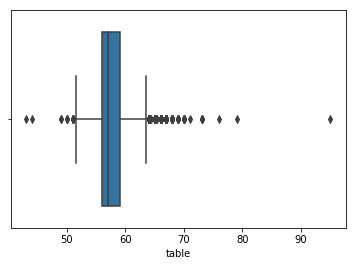

In [5]:
df_table = df["table"].copy()
sns.boxplot(x=df_table)

In [6]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5*IQR
alt_sinir

51.5

In [9]:
ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

In [10]:
#Aykırı değer sorgulaması

(df_table <(alt_sinir)) | (df_table >(ust_sinir))

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
aykiri_tf = df_table < (alt_sinir)

aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [13]:
aykirilar = df_table[aykiri_tf]
aykirilar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [14]:
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

Aykırı Değer Probleminin Çözülmesi(Tek Değişkenli Aykırı Gözlem Doldurmak)

In [ ]:
#1) Aykırı Değerleri Silmek

import pandas as pd

In [17]:
df_table.head()
type(df_table)
df_table.shape

(53940,)

In [24]:
df_table = df_table.to_frame()
type(df_table)

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [25]:
df_table.shape

(53940, 1)

In [26]:
temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]

In [27]:
temiz_df_table.shape

(53335, 1)

In [28]:
#2) Aykırı Değerleri Ortalama İle Doldurmak

df_table = df["table"].copy()

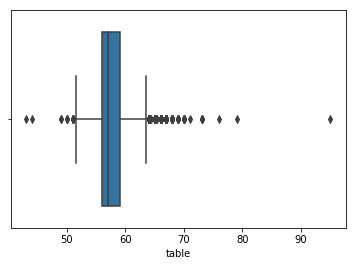

In [29]:
sns.boxplot(x = df_table)

In [31]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [32]:
df_table.mean()

57.45718390804603

In [33]:
df_table[aykiri_tf] = df_table.mean()

In [34]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [35]:
#3) Aykırı Değerleri Baskılama Yöntemi İle Doldurmak

df_table = df["table"].copy()

In [36]:
aykiri_tf = df_table < (alt_sinir)

In [37]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [38]:
df_table[aykiri_tf] = alt_sinir

In [39]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

Çok Değişkenli Aykırı Gözlem Analizi

Local Outlier Factor

In [ ]:
#Bir değerin çevresi(komşuları) yoğun değilse bu değer aykırı değerdir.